In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("C:/Users/patan/DS/Machine Learning/Dataset/train (1).csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
sub_df = df[["GarageQual","FireplaceQu","SalePrice"]]
sub_df

,GarageQual,FireplaceQu,SalePrice
0,TA,NaN,208500
1,TA,TA,181500
2,TA,TA,223500
3,TA,Gd,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,TA,Gd,266500
1458,TA,NaN,142125


#  Using Pandas 

In [4]:
sub_df.isnull().mean()

GarageQual     0.055479
FireplaceQu    0.472603
SalePrice      0.000000
dtype: float64

In [5]:
sub_df.mode()

,GarageQual,FireplaceQu,SalePrice
0,TA,Gd,140000


<Axes: xlabel='GarageQual'>

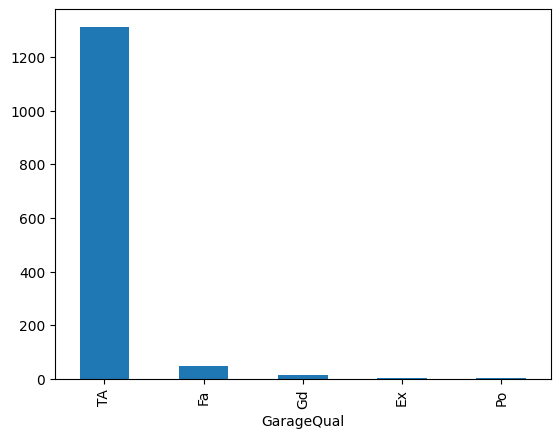

In [6]:

df['GarageQual'].value_counts().plot(kind='bar')

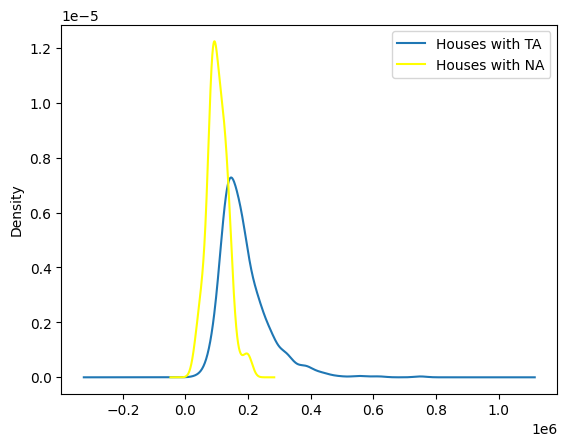

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
sub_df[sub_df["GarageQual"] ==  "TA"]["SalePrice"].plot(kind = "kde" , ax =ax) 
sub_df[sub_df["GarageQual"].isnull()]["SalePrice"].plot(kind = "kde" , ax = ax, color = "yellow")
lines, labels = ax.get_legend_handles_labels()
labels = ['Houses with TA', 'Houses with NA']
ax.legend(lines, labels, loc='best')
# df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)


In [8]:
temp = sub_df[sub_df["GarageQual"] ==  "TA"]["SalePrice"]

#  Fill missing value

In [9]:
sub_df["GarageQual"].fillna("TA", inplace = True)
sub_df.isnull().sum()

C:\Users\patan\AppData\Local\Temp\ipykernel_2204\1309962549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["GarageQual"].fillna("TA", inplace = True)


GarageQual       0
FireplaceQu    690
SalePrice        0
dtype: int64

<Axes: xlabel='GarageQual'>

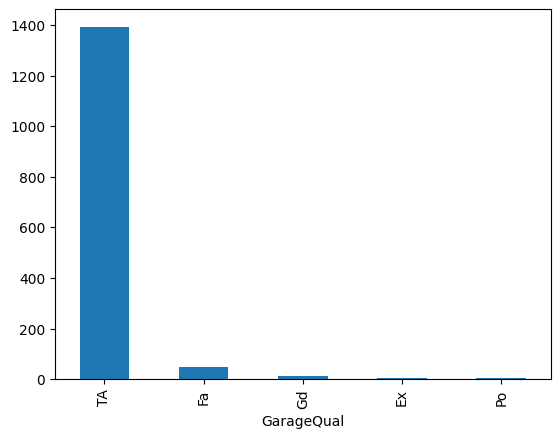

In [10]:
sub_df["GarageQual"].value_counts().plot(kind = "bar")

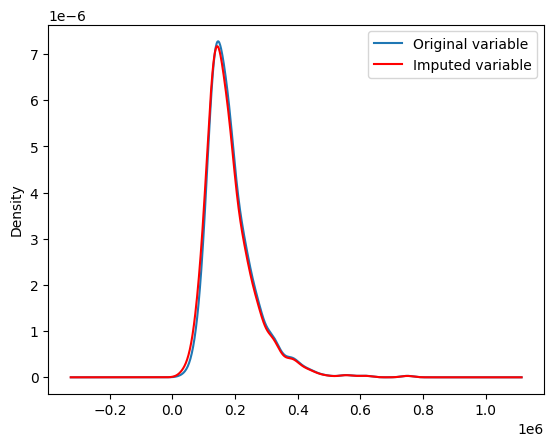

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind = "kde" , ax =ax) 
sub_df[sub_df["GarageQual"] ==  "TA"]["SalePrice"].plot(kind = "kde" , ax =ax , color = "red") 
lines, labels = ax.get_legend_handles_labels()
labels =  ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
# df[df['GarageQual']=='TA']['SalePrice'].plot(kind='kde', ax=ax)


#  For FireplaceQute mode imputation using pandas

In [15]:
sub_df["FireplaceQu"].isnull().mean()

0.4726027397260274

In [16]:
FireplaceQu_mode = sub_df["FireplaceQu"].mode()

0    Gd
Name: FireplaceQu, dtype: object

<Axes: xlabel='FireplaceQu'>

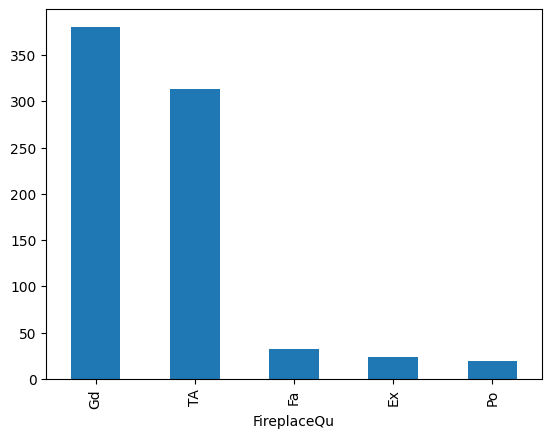

In [19]:
sub_df["FireplaceQu"].value_counts().plot(kind = "bar")

Text(0.5, 1.0, 'FireplaceQu')

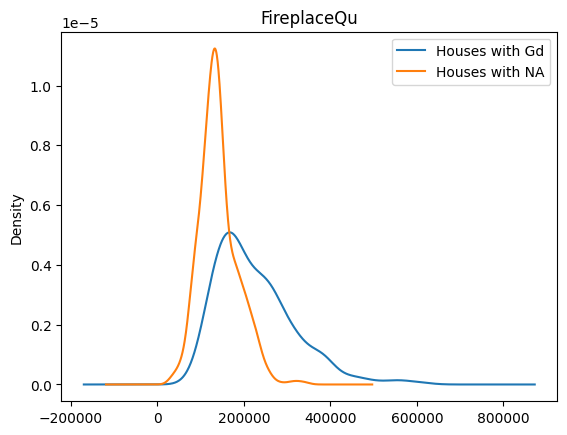

In [26]:
fig = plt.figure()
ax = fig.add_subplot(111)
sub_df[sub_df["FireplaceQu"] == "Gd"]["SalePrice"].plot(kind = "kde" , ax = ax)
sub_df[sub_df["FireplaceQu"].isnull()]["SalePrice"].plot(kind ='kde', ax = ax)
lines, labels = ax.get_legend_handles_labels()
# ax.get_legend_handles_labels()
labels = ['Houses with Gd', 'Houses with NA']
ax.legend(lines, labels, loc = "best")
plt.title('FireplaceQu')

In [27]:
temp2 = sub_df[sub_df["FireplaceQu"] == "Gd"]["SalePrice"]

In [28]:
sub_df["FireplaceQu"].fillna("Gd", inplace = True)

C:\Users\patan\AppData\Local\Temp\ipykernel_2204\3534508119.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df["FireplaceQu"].fillna("Gd", inplace = True)


<Axes: xlabel='FireplaceQu'>

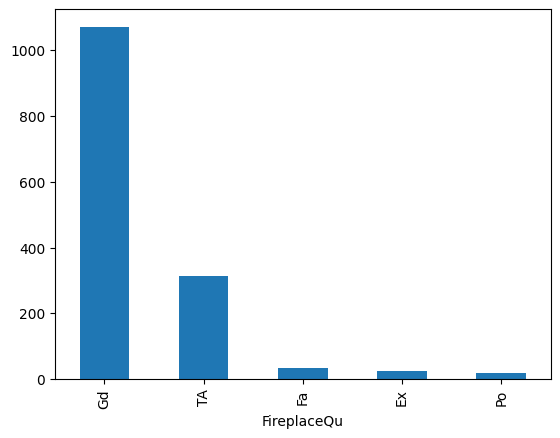

In [29]:
sub_df["FireplaceQu"].value_counts().plot(kind = "bar")

Text(0.5, 1.0, 'FireplaceQu')

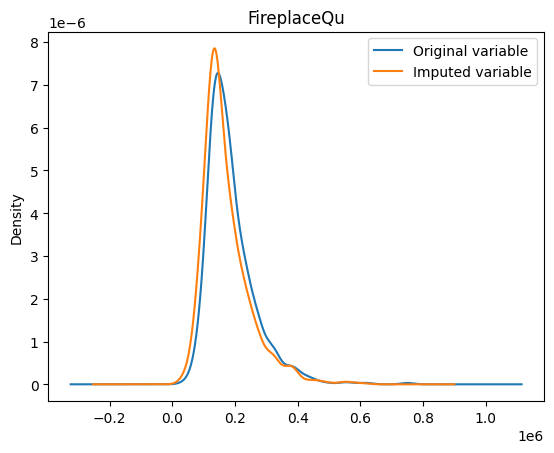

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
temp.plot(kind= "kde", ax = ax)
sub_df[sub_df["FireplaceQu"] == "Gd"]["SalePrice"].plot(kind = "kde", ax = ax)
lines, labels = ax.get_legend_handles_labels()
labels = ['Original variable', 'Imputed variable']
ax.legend(lines, labels, loc='best')
# add title
plt.title('FireplaceQu')
